In [4]:
import pandas as pd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print(train.dtypes)

id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object


In [8]:
def barplot(attr, color='b', train_only=False):
    plt.figure();
    
    plt.subplot(2,1,1)
    plt.title(attr + ' train')
    data = train.groupby(attr, as_index=False).count()[[attr, 'id']]
    sns.barplot(data[attr], data['id'], color=color, saturation=.5)

    if not train_only:
        plt.subplot(2,1,2)
        plt.title(attr + ' test')
        data = test.groupby(attr, as_index=False).count()[[attr, 'id']]
        sns.barplot(data[attr], data['id'], color=color, saturation=.5)

In [9]:
def histogram(attr, color='b'):
    plt.figure();
    plt.subplot(2,1,1)
    plt.title(attr + ' train')
    train[attr].hist(color=color)
    plt.subplot(2,1,2)
    plt.title(attr + ' test')
    test[attr].hist(color=color)

Training data

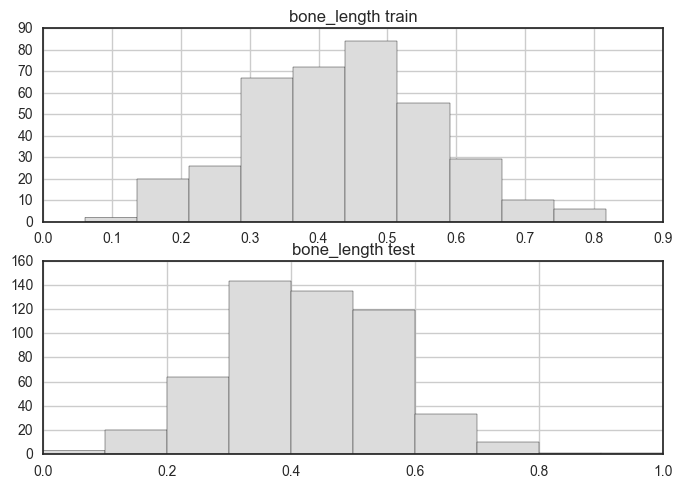

In [10]:
histogram('bone_length', color='Gainsboro')

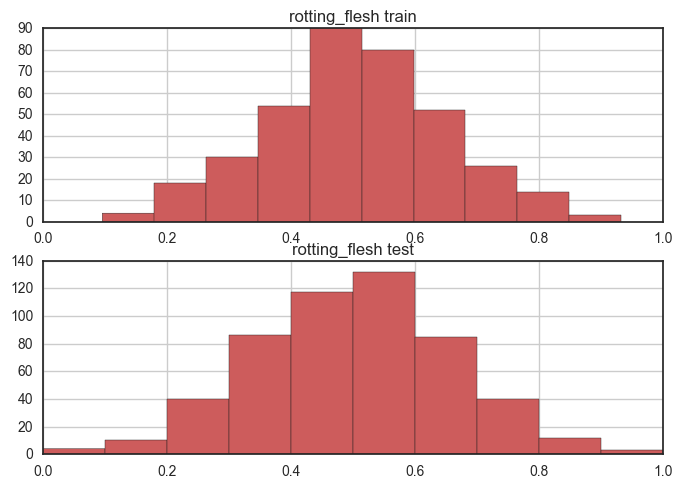

In [11]:
histogram('rotting_flesh', color='IndianRed')

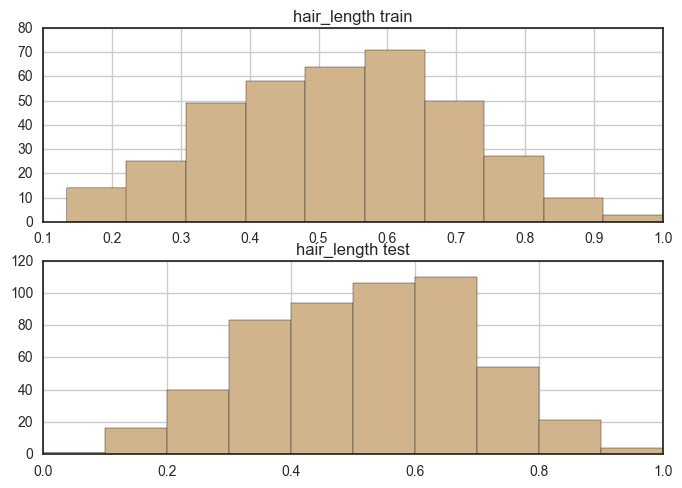

In [12]:
histogram('hair_length', color='Tan')

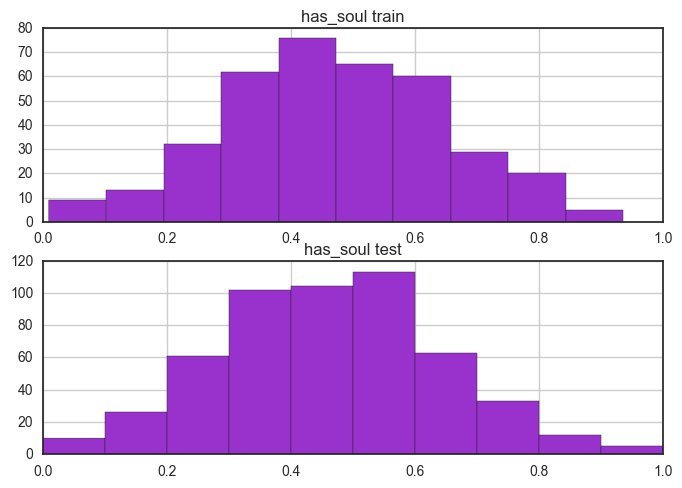

In [13]:
histogram('has_soul', color='DarkOrchid')

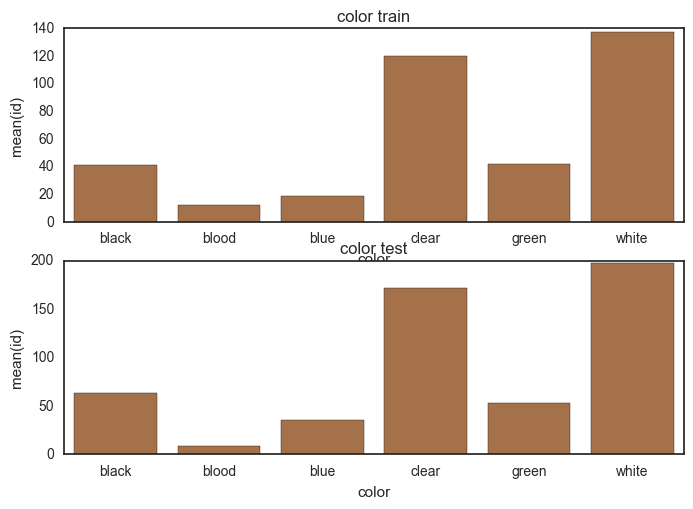

In [14]:
barplot('color', color='chocolate')

In [15]:
barplot('type', color='white', train_only=True)

Classification

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn import preprocessing
color_encoder = preprocessing.LabelEncoder()
color_encoder.fit(train['color'])
type_encoder = preprocessing.LabelEncoder()
type_encoder.fit(train['type'])

LabelEncoder()

In [18]:
X_train = train.drop("type", axis=1)
X_train['color'] = color_encoder.transform(train['color'])
Y_train = train["type"]
Y_train = type_encoder.transform(train['type'])

test['color'] = color_encoder.transform(test['color'])

In [19]:
def export_submission(pred, name):
    pred = type_encoder.inverse_transform(pred)
    submission = pd.DataFrame({
        "id": test["id"],
        "type": pred
    })
    submission.to_csv(name + '.csv', index=False)

In [20]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(test)
print(gaussian.score(X_train, Y_train))
export_submission(Y_pred, 'gaussian_nb')

0.760107816712


In [21]:
numerical_features = ['bone_length',
                      'rotting_flesh',
                      'hair_length',
                      'has_soul']

In [21]:
# Gaussian NB with feature scaling
# tmp_train = X_train.copy()
# scaler = preprocessing.MinMaxScaler()
# tmp_train[numerical_features] = scaler.fit_transform(tmp_train[numerical_features])

# gaussian = GaussianNB()
# gaussian.fit(tmp_train, Y_train)
# Y_pred = gaussian.predict(test)
# print(gaussian.score(tmp_train, Y_train))
# export_submission(Y_pred, 'gaussian_nb_minmax')

In [22]:
# Random forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(test)
print(random_forest.score(X_train, Y_train))
export_submission(Y_pred, 'rforest_100')

1.0


In [23]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [24]:
# SVM
# from sklearn import svm
# from sklearn.grid_search import GridSearchCV

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# svr = svm.SVC()
# svm_grid = GridSearchCV(svr, parameters)
# svm_grid.fit(X_train, Y_train)
# Y_pred = svm_grid.predict(test)
# print(svm_grid.score(X_train, Y_train))
# export_submission(Y_pred, 'svm_grid')

In [38]:
# def grid_search(x, y):
#     # Split the dataset in two equal parts
#     X_holdout_train, X_holdout_eval, y_holdout_train, y_holdout_eval = train_test_split(
#         x, y, test_size=0.5, random_state=0)

#     # Set the parameters by cross-validation
#     tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                          'C': [1, 10, 100, 1000]},
#                         {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#     scores = ['precision', 'recall']
#     for score in scores:
#         print("# Tuning hyper-parameters for %s" % score)
#         print()

#         clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
#                            scoring='%s_macro' % score, n_jobs=4)
#         clf.fit(X_holdout_train, y_holdout_train)

#         print("Best parameters set found on development set:")
#         print()
#         print(clf.best_params_)
#         print()

#         print("Detailed classification report:")
#         print()
#         print("The model is trained on the full development set.")
#         print("The scores are computed on the full evaluation set.")
#         print()
#         y_true, y_pred = y_holdout_eval, clf.predict(X_holdout_eval)
#         print(classification_report(y_true, y_pred))
#         print()

In [39]:
# grid_search(X_train, Y_train)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.78      0.89      0.84        57
          1       0.71      0.73      0.72        63
          2       0.61      0.52      0.56        66

avg / total       0.70      0.70      0.70       186


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.78      0.89      0.84        57
          1       0.71      0.73      0.72        63
          2       0.61      0.52      0.56        66

avg / tota

In [23]:
# # Tuning hyper-parameters for precision
# 
# Best parameters set found on development set:
# 
# {'C': 10, 'kernel': 'linear'}
# 
# Detailed classification report:
# 
# The model is trained on the full development set.
# The scores are computed on the full evaluation set.
# 
#              precision    recall  f1-score   support
# 
#           0       0.78      0.89      0.84        57
#           1       0.71      0.73      0.72        63
#           2       0.61      0.52      0.56        66
# 
# avg / total       0.70      0.70      0.70       186
# 
# 
# # Tuning hyper-parameters for recall
# 
# Best parameters set found on development set:
# 
# {'C': 10, 'kernel': 'linear'}
# 
# Detailed classification report:
# 
# The model is trained on the full development set.
# The scores are computed on the full evaluation set.
# 
#              precision    recall  f1-score   support
# 
#           0       0.78      0.89      0.84        57
#           1       0.71      0.73      0.72        63
#           2       0.61      0.52      0.56        66
# 
# avg / total       0.70      0.70      0.70       186

In [25]:
from sklearn.svm import SVC
svr = SVC(C=10, kernel='linear')
svr.fit(X_train, Y_train)
Y_pred = svr.predict(test)
print(svr.score(X_train, Y_train))
export_submission(Y_pred, 'svr_best')

0.770889487871
